In [1]:
from datetime import date, timedelta
from constants import *
from bars import plot_bars as plot_areas, unique_people_tested, daily_vaccinations, population_vaccinated
from heatmap import heatmap
from maps import case_maps
from phe import *
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

In [2]:
latest_changes(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum)

Latest for England:
41,075 cases (7 day average) as of Mon 06 Dec, +374.7 since Sun 05 Dec
714 hospitalised (7 day average) as of Wed 08 Dec, +0.0 since Wed 08 Dec
94 died (7 day average) as of Mon 06 Dec, +1.6 since Sun 05 Dec


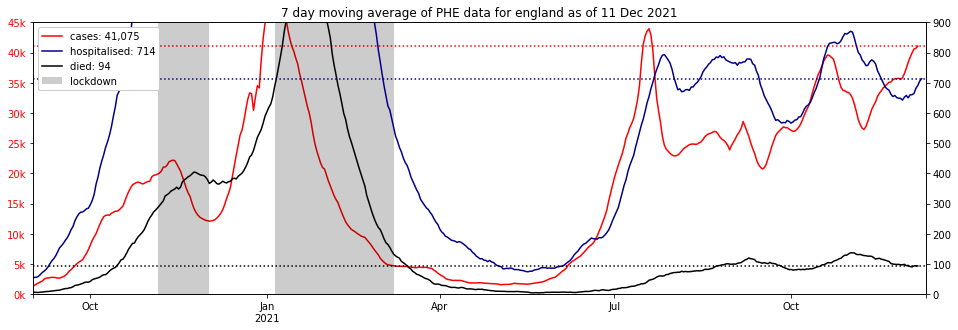

In [3]:
plot_summary(earliest_date='2020-09-01', show_latest='lines',
             left_series=(s.new_cases_sum,), left_formatter=per1k_formatter, left_ymax=45_000,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0_formatter, right_ymax=900)

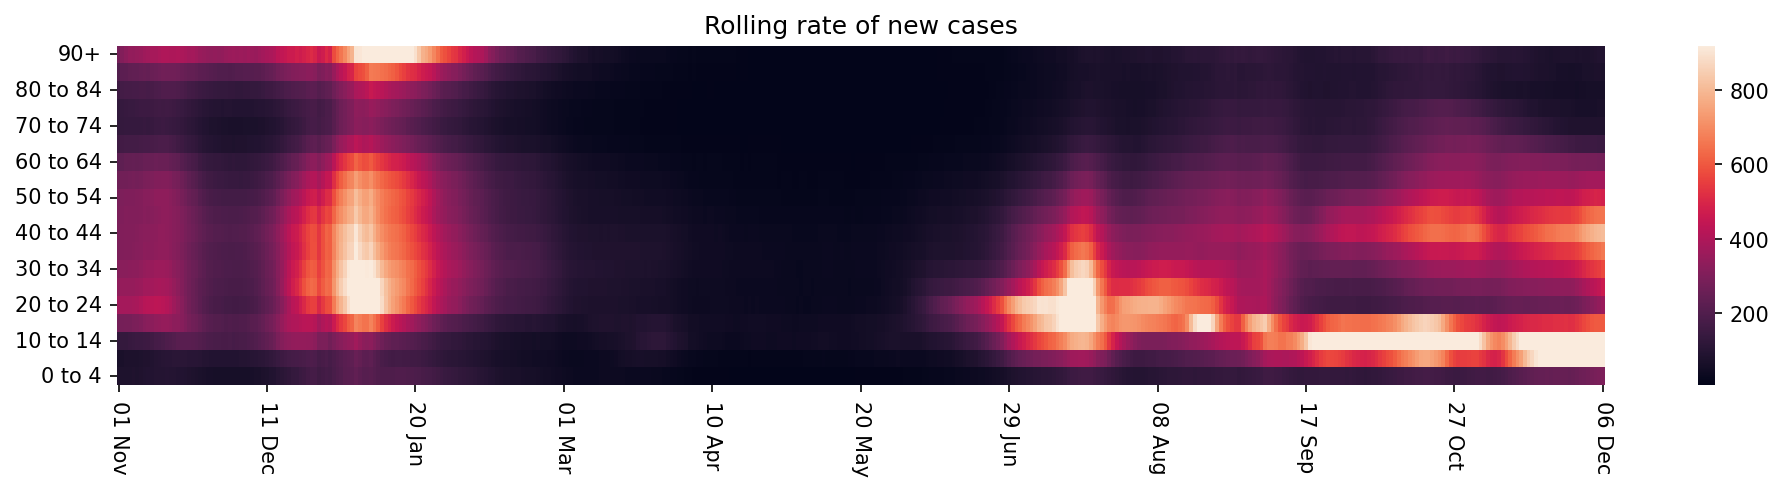

In [4]:
data = load_demographic_data('case_demographics_nation', 'England', 'rollingRate', start='2020-11')[0]
heatmap(data, title='Rolling rate of new cases', figsize=(16, 3))

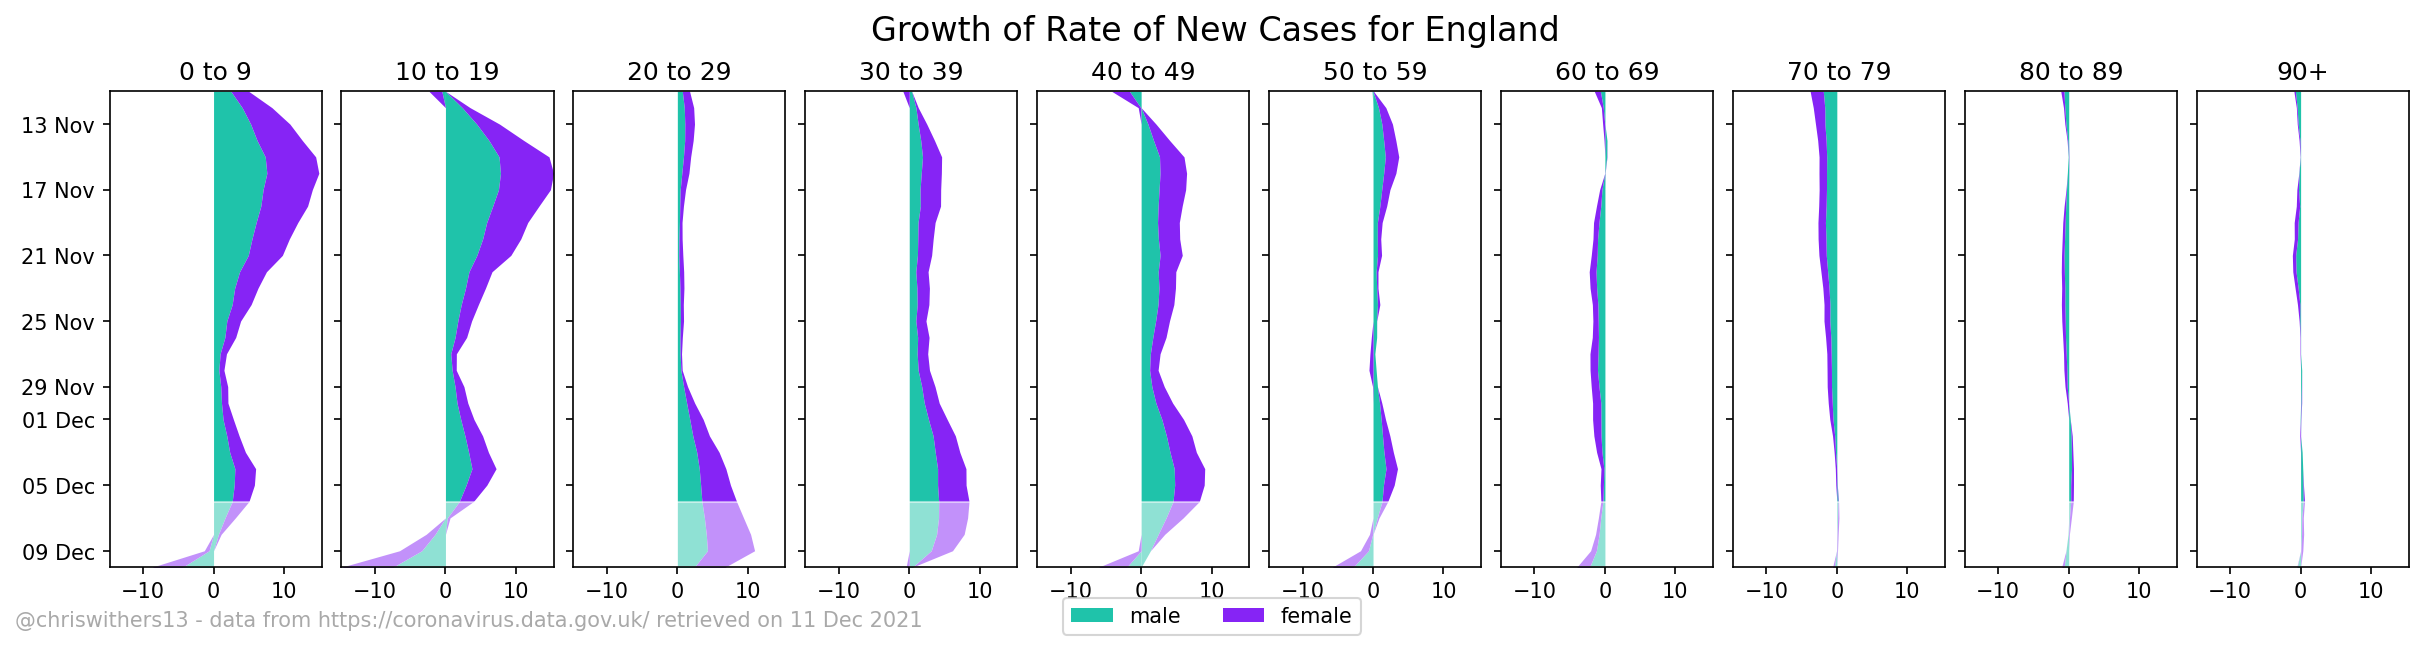

In [5]:
demographic_stream_plot('Growth of Rate of New Cases', order=2, figsize=(16, 4))

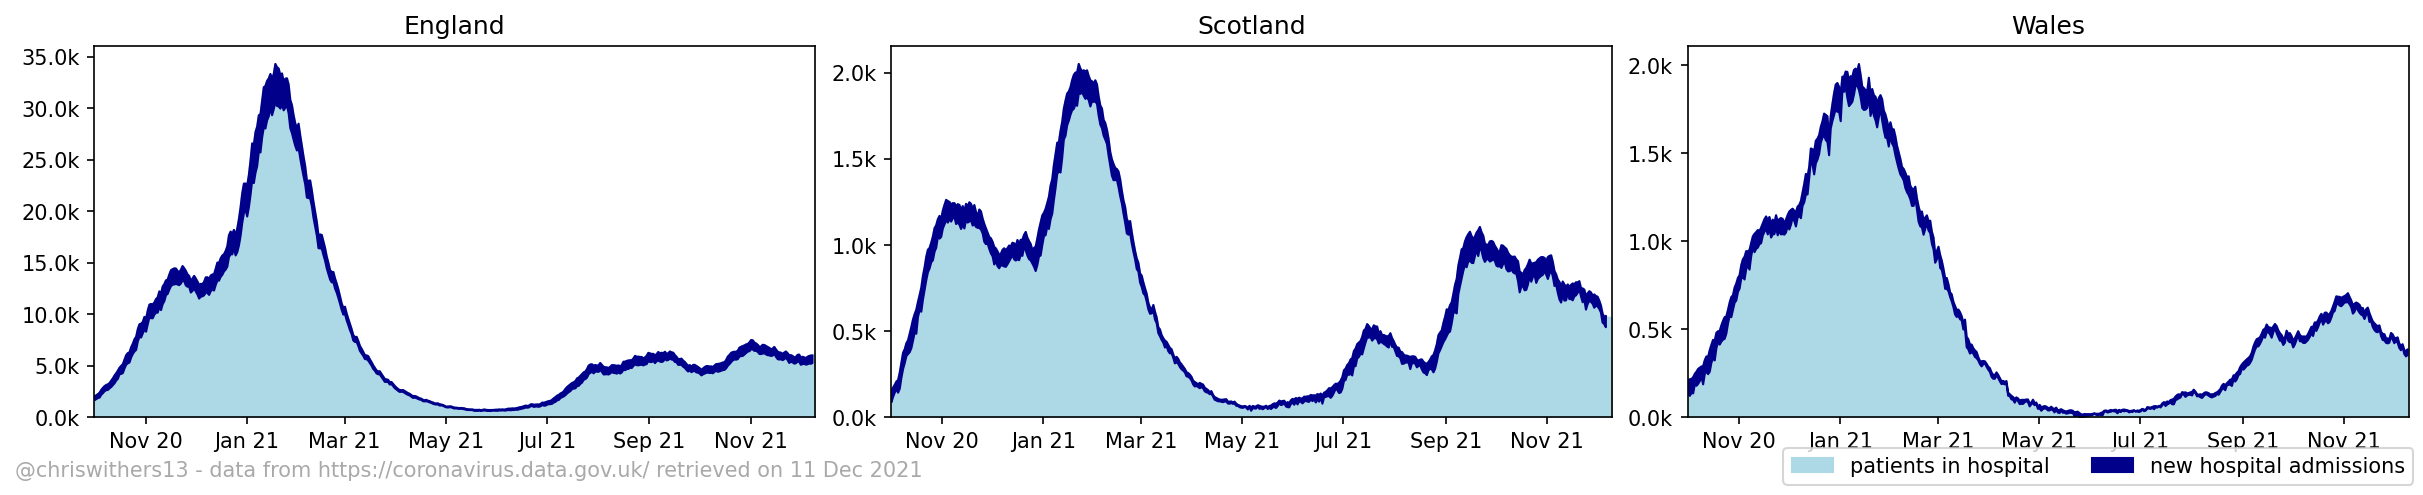

In [6]:
hospital_plot(start='2020-10', figsize=(16,3), figs=(1, 3))

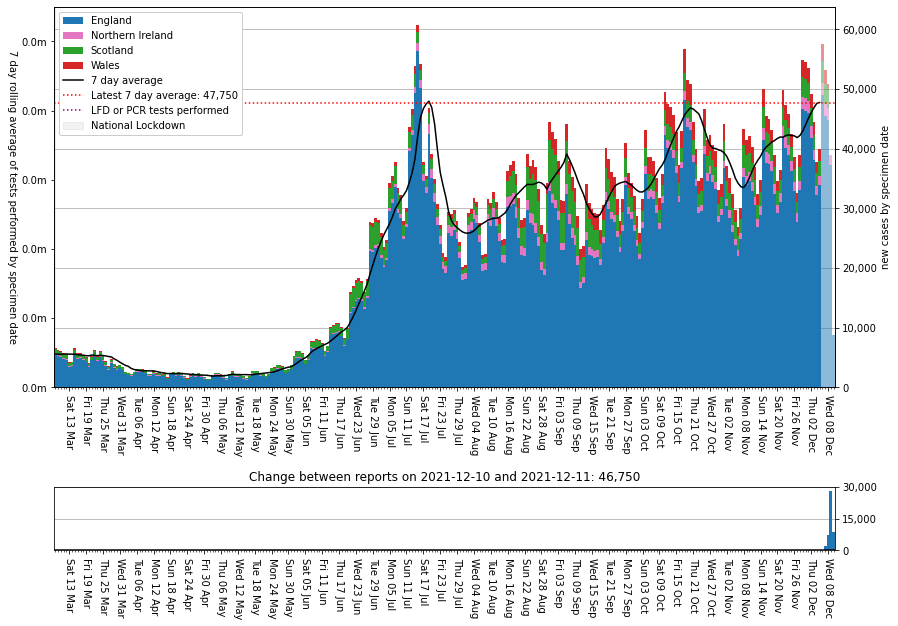

In [7]:
plot_areas(for_date, 'cases_nations', date_format='%a %d %b')

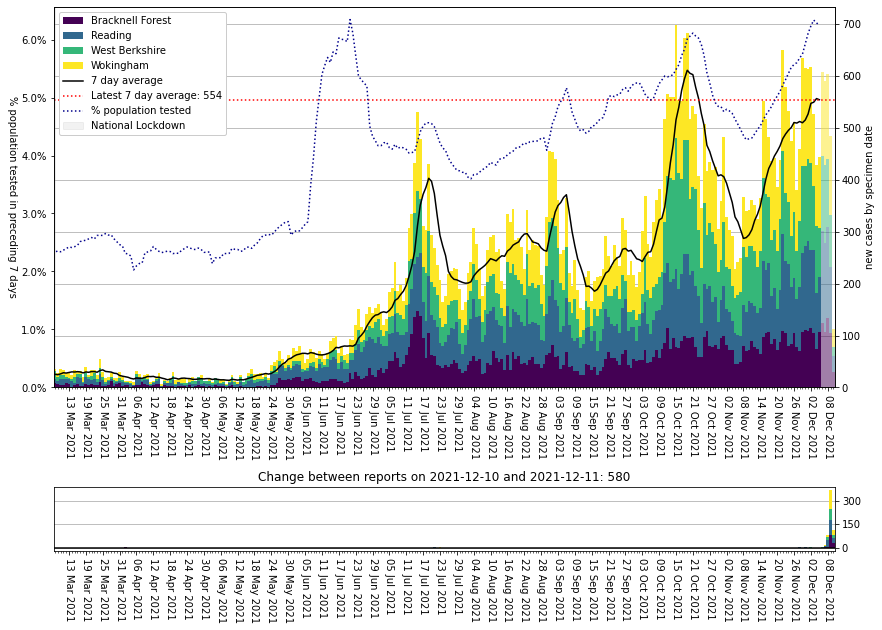

In [8]:
plot_areas(for_date, areas=my_areas, lines=unique_people_tested)

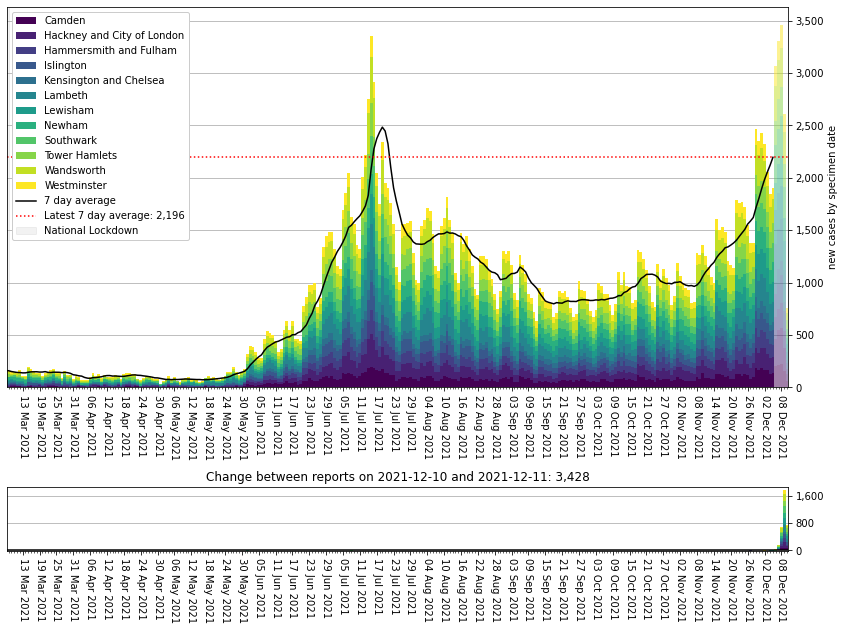

In [19]:
plot_areas(for_date, areas=london_areas)

In [10]:
data = recent_phe_data_summed(for_date)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [11]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

areaName  per 100,000 people  newCasesBySpecimenDate  \
areaCode                                                                        
E06000026                Plymouth          800.457841                  2098.0   
E07000155  South Northamptonshire          786.326595                   743.0   
E07000179       South Oxfordshire          765.889748                  1088.0   
E07000211    Reigate and Banstead          754.295856                  1122.0   
E07000044              South Hams          750.540205                   653.0   
N09000010  Newry, Mourne and Down          733.867055                  1331.0   
E07000180     Vale of White Horse          723.492173                   984.0   
E07000006             South Bucks          712.663260                   502.0   
E07000047              West Devon          700.767080                   391.0   
E07000207               Elmbridge          688.621660                   942.0   

          Specimen date  
areaCode                 
E06000026    2021-12-10  
E07000155    2021-12-10  
E07000179    2021-12-10  
E07000211    2021-12-10  
E07000044    2021-12-10  
N09000010    2021-12-10  
E07000180    2021-12-10  
E07000006    2021-12-10  
E07000047    2021-12-10  
E07000207    2021-12-10

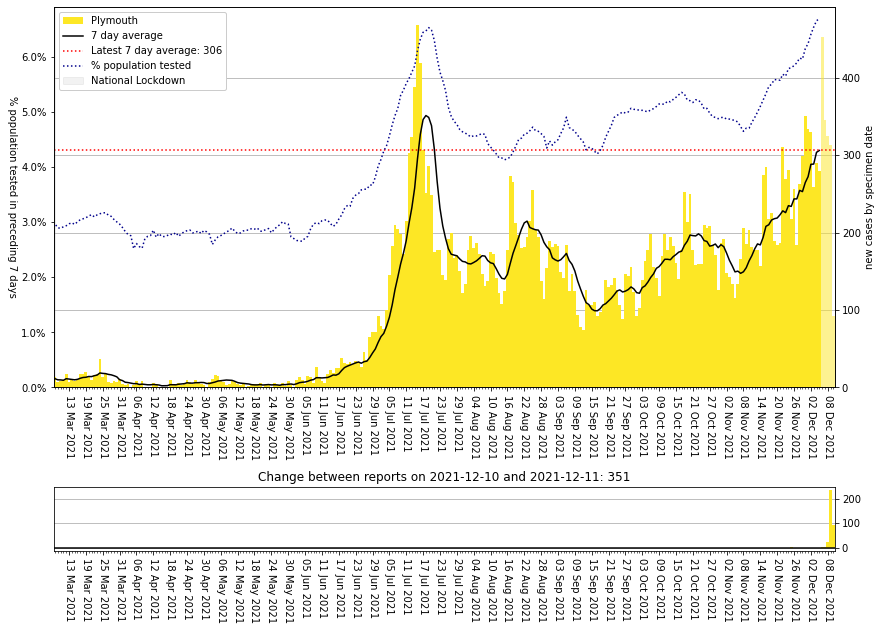

In [12]:
plot_areas(for_date, areas=[top_10.iloc[0].name], colormap='viridis_r', lines=unique_people_tested)

In [13]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

areaName  per 100,000 people  \
areaCode                                                             
E08000025                           Birmingham          327.460817   
E06000052         Cornwall and Isles of Scilly          443.510166   
E06000054                            Wiltshire          461.777835   
E08000035                                Leeds          274.857244   
E06000026                             Plymouth          800.457841   
E06000058  Bournemouth, Christchurch and Poole          527.153196   
E08000003                           Manchester          372.609241   
E09000008                              Croydon          499.599183   
E09000032                           Wandsworth          581.781562   
E06000023                     Bristol, City of          412.407176   

           newCasesBySpecimenDate Specimen date  
areaCode                                         
E08000025                  3739.0    2021-12-10  
E06000052                  2536.0    2021-12-10  
E06000054                  2309.0    2021-12-10  
E08000035                  2180.0    2021-12-10  
E06000026                  2098.0    2021-12-10  
E06000058                  2084.0    2021-12-10  
E08000003                  2060.0    2021-12-10  
E09000008                  1932.0    2021-12-10  
E09000032                  1918.0    2021-12-10  
E06000023                  1911.0    2021-12-10

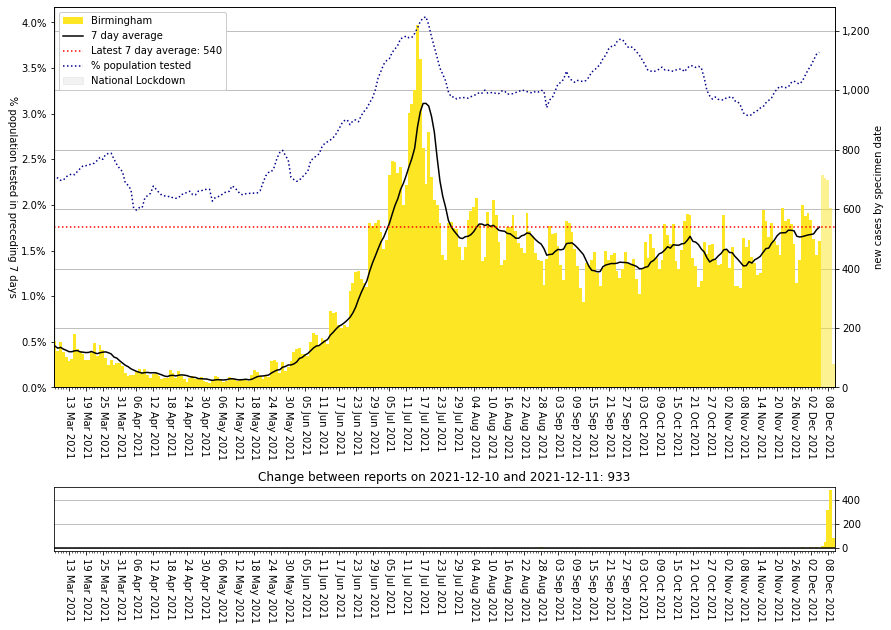

In [14]:
plot_areas(for_date, areas=[top_10.iloc[0].name], colormap='viridis_r', lines=unique_people_tested)

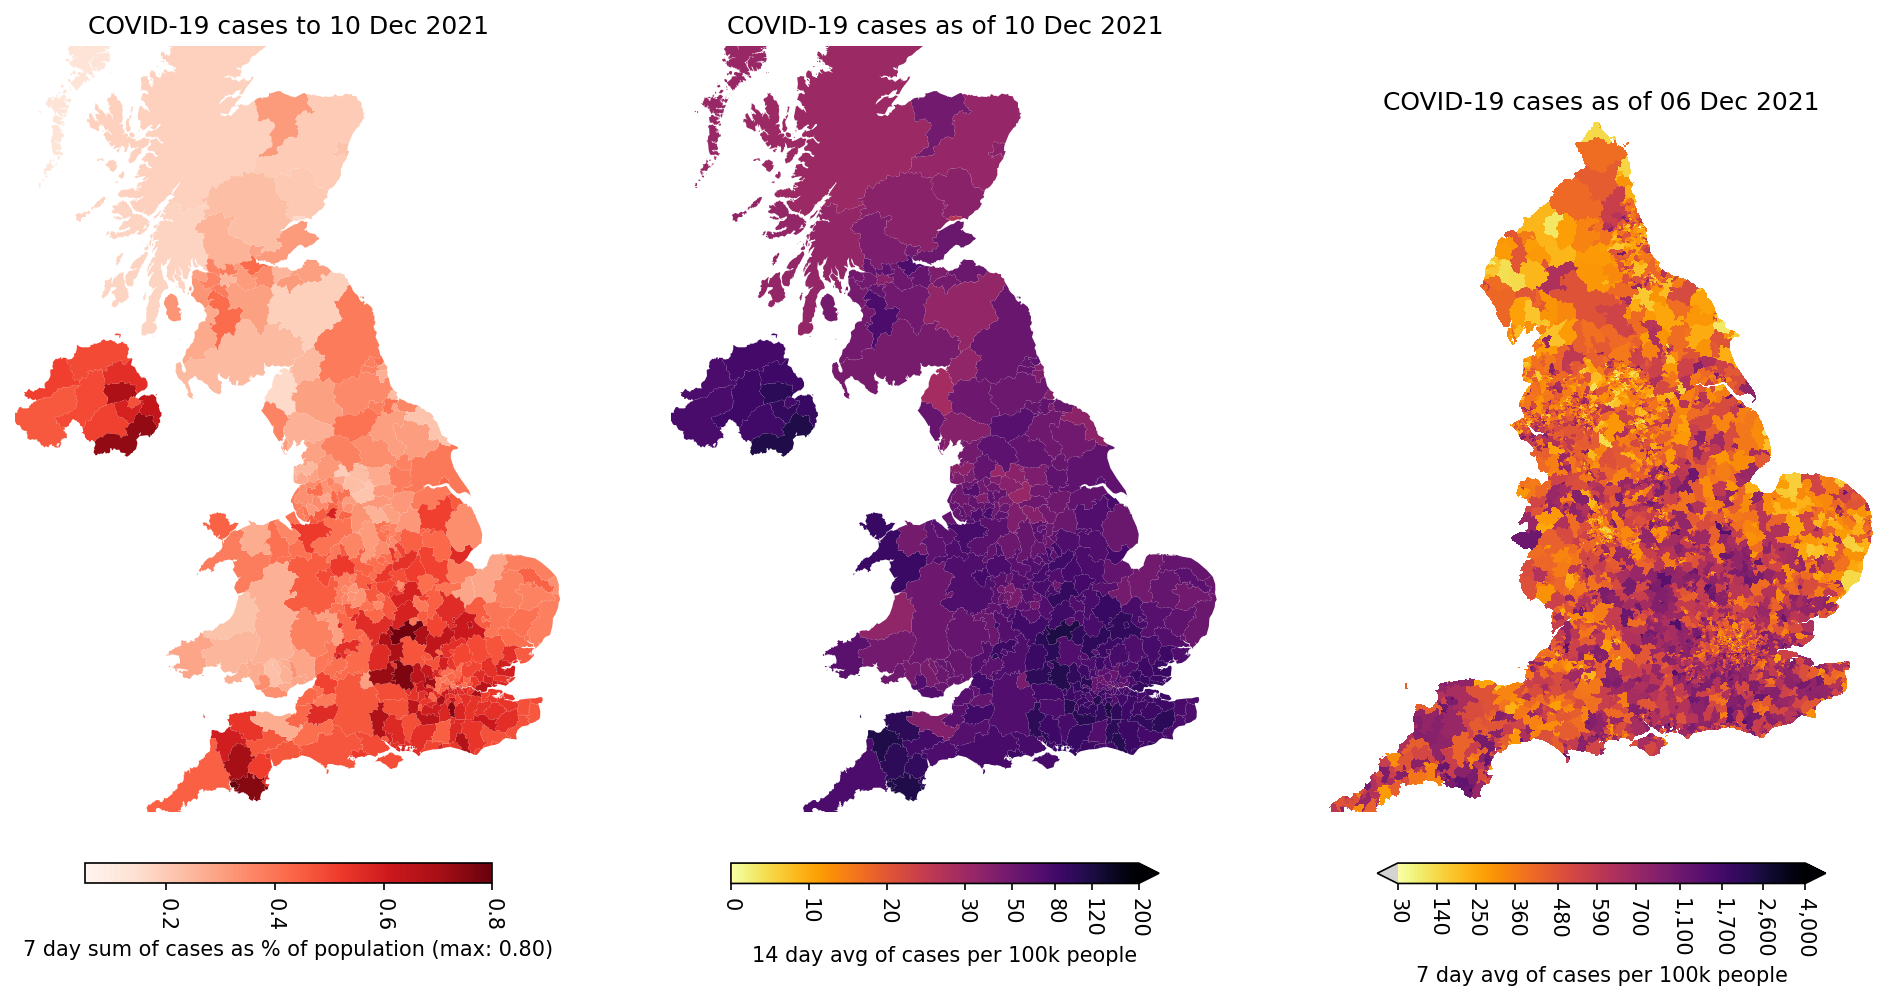

Loading BokehJS ...

In [18]:
case_maps(for_date, sum_vmax=0.8)

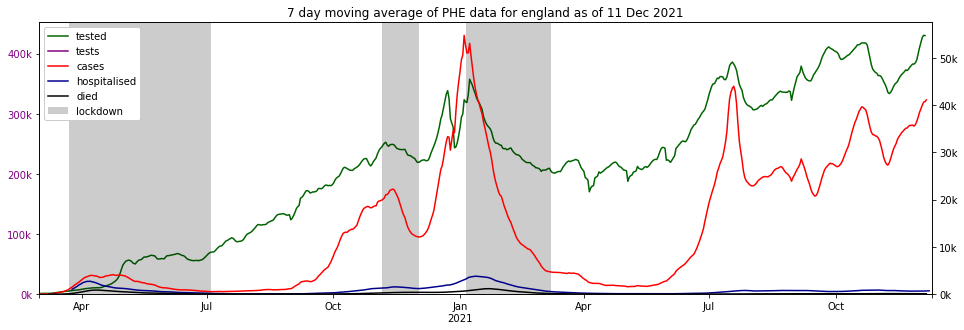

In [16]:
plot_summary(left_series=(s.unique_people_tested_sum, s.new_virus_tests_sum),
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

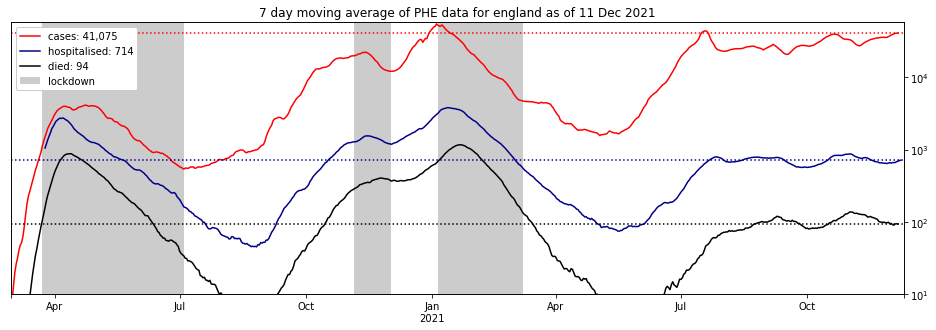

In [17]:
plot_summary(earliest_date='2020-02-29', show_latest='lines', log=True,
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))